### IBM HR Analytics Employee Attrition & Performance Dataset from Kaggle

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'C:\Users\Shubham\Downloads\HR_IBM.csv')


In [9]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [11]:
df.isnull().sum()
##There are no Nulls in the Dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
# Writing a code to input some random NAN values in the dataset

import random
ran = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
print(len(ran))
for row, col in random.sample(ran, (round(.05*len(ran)))):
    df.iat[row, col] = None

51450


In [13]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,None,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,NaN,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,None,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,NaN,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,NaN,2.0


In [14]:
df.isnull().sum().sum()

2572

In [15]:
percent_missing = df.isnull().sum() * 100 / len(df)


In [16]:
round(percent_missing.mean(),2)

5.0

#### 5% Missing Values in Data

# Removing some columns because of redundancy and no use.

In [17]:
df.drop(['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], axis =1, inplace = True)

In [18]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,None,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,None,8.0,1.0,Life Sciences,3.0,Male,...,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,NaN,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,NaN,2.0


In [19]:
df.shape
#So we will be performing our analysis on 1470 rows and 31 columns

(1470, 31)

In [20]:
df.fillna(value=pd.np.nan, inplace=True)
#Replacing None values with NaN

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,NaN,8.0,1.0,Life Sciences,3.0,Male,...,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,NaN,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,NaN,2.0


### Imputing Numerical Variables

In [22]:
dfn = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
dfn.head(5)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,0.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,NaN,10.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,3.0,0.0,0.0,0.0,0.0
3,33.0,NaN,3.0,56.0,2909.0,23159.0,1.0,NaN,8.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,40.0,3468.0,16632.0,9.0,12.0,6.0,3.0,2.0,2.0,NaN,2.0


#### We can replace the NaN values in dfn with Mean or Median values. But the mean is likely to be skewed so we choose median value

In [23]:
for col in dfn:
    df[col] = df[col].fillna(df[col].median())

In [24]:
df.isnull().sum()

Age                          0
Attrition                   76
BusinessTravel              61
DailyRate                    0
Department                  72
DistanceFromHome             0
Education                   74
EducationField              78
EnvironmentSatisfaction     82
Gender                      72
HourlyRate                   0
JobInvolvement              79
JobLevel                    80
JobRole                     67
JobSatisfaction             71
MaritalStatus               72
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                    83
PercentSalaryHike            0
PerformanceRating           65
RelationshipSatisfaction    64
StockOptionLevel            69
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance             71
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [25]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,NaN,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,NaN,8.0,1.0,Life Sciences,3.0,Male,...,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,798.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,1.0,2.0


### Imputing Categorical Variables

In [26]:
dfc = df[['Education', 'EnvironmentSatisfaction' ,'JobInvolvement','JobLevel','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]
for col in dfc:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [27]:
dfO= df.select_dtypes(include=['object'])

for col in dfO:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [28]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,No,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,798.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,1.0,2.0


In [29]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Encoding Categorical Features

### Analyzing Target Data 

In [30]:
print(df['Attrition'].unique())

['No' 'Yes']


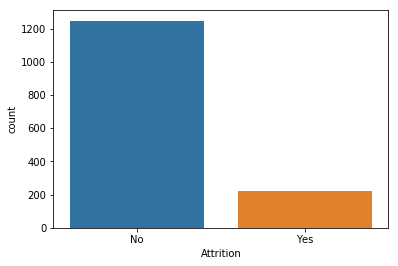

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Attrition'],label="Count")
plt.show()

#### Histogram of DataSet 

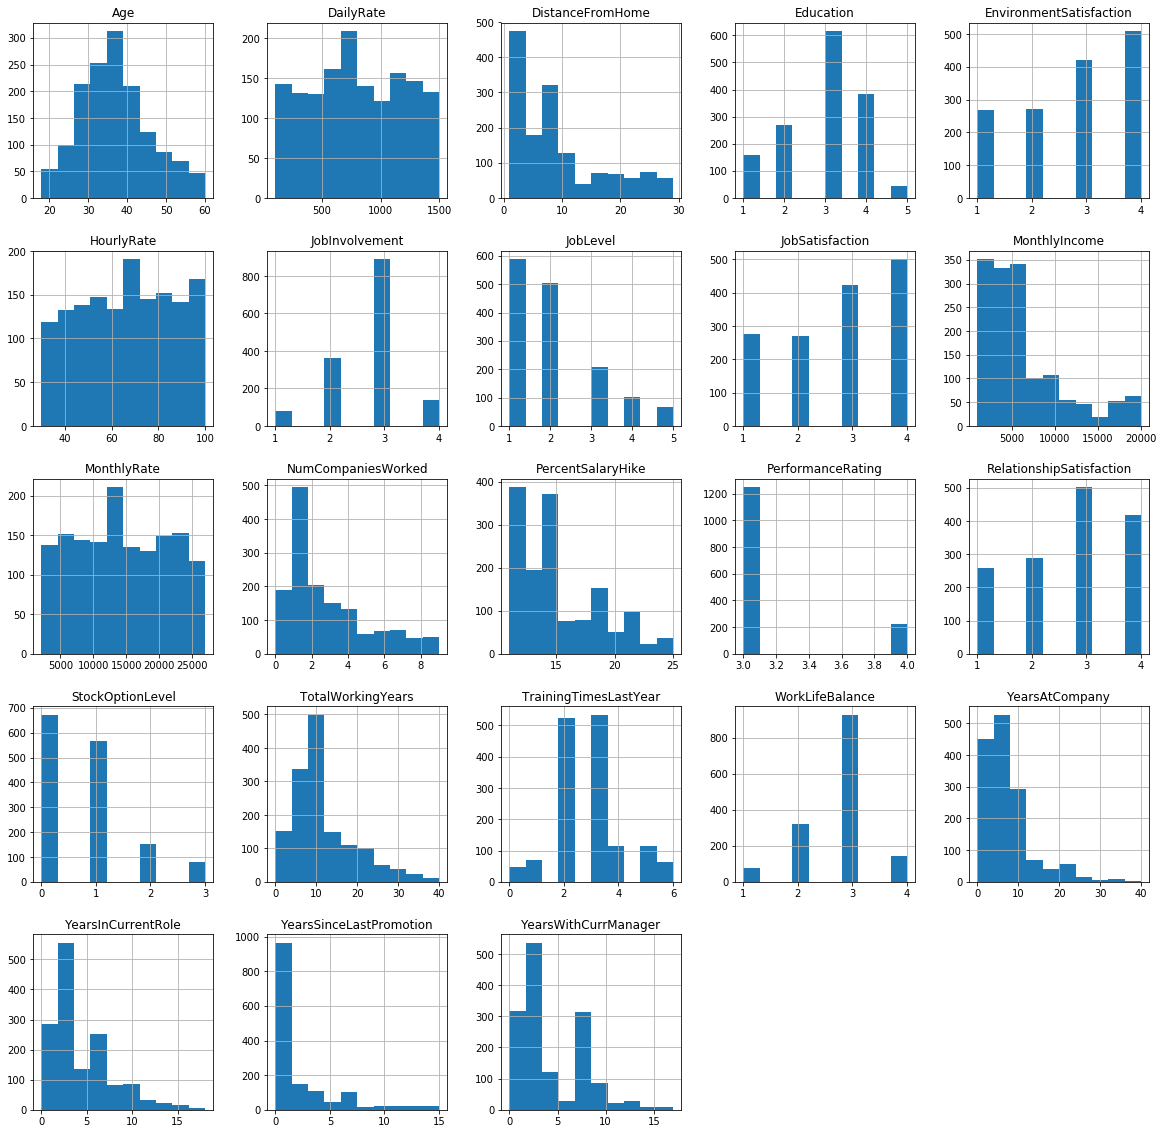

In [32]:
pd.DataFrame.hist(df, figsize = [20,20]);

#### Checking  frequency distrubuance of Categorical Features

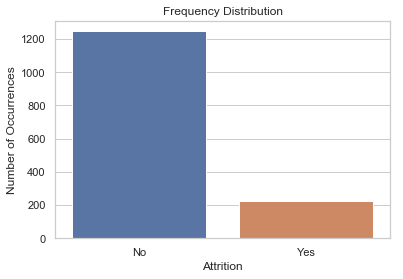

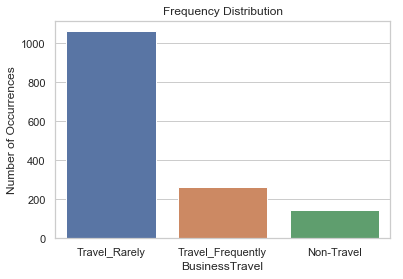

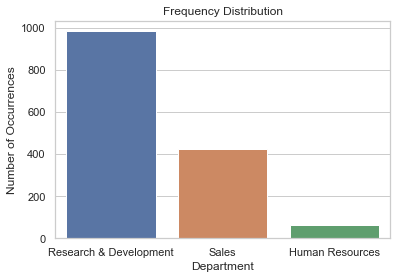

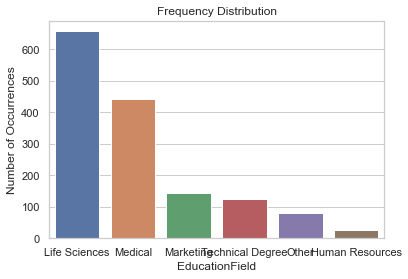

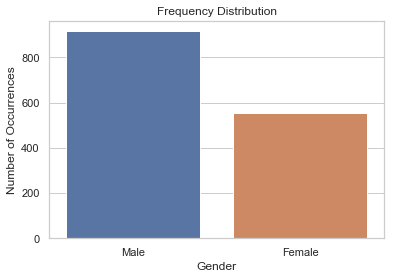

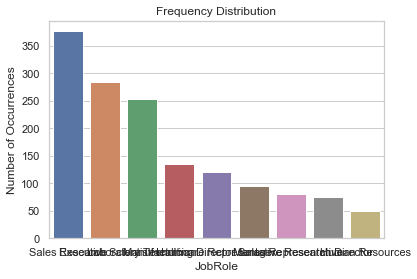

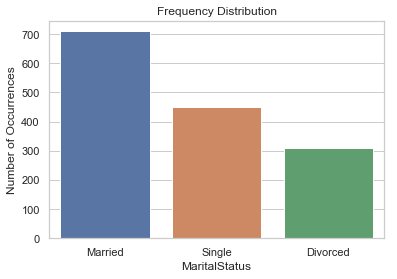

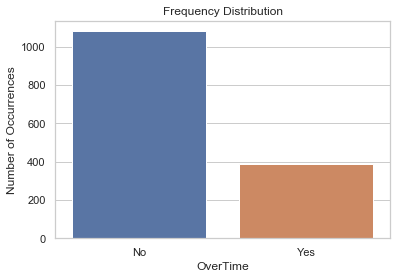

In [33]:
for col in dfO:
    count = df[col].value_counts()
    sns.set(style="whitegrid")
    sns.barplot(count.index, count.values)
    plt.title('Frequency Distribution',fontsize=12)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

### Mapping Nominal Variables

In [34]:
dfcat = df[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

In [35]:
dfcat['Attrition'] = dfcat['Attrition'].map({'Yes':1, 'No':0})
dfcat['Gender'] = dfcat['Gender'].map({'Male':1, 'Female':0})
dfcat['OverTime'] = dfcat['OverTime'].map({'Yes':1, 'No':0})

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

Here we used mapping because these columns have only 2 unique values

In [36]:
dfname = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

for col in dfname:
    data = pd.get_dummies(df[col], prefix=col)
    dfcat = pd.concat([dfcat,data], axis = 1)
    dfcat.drop(col, axis = 1, inplace=True)

One Hot Vector used since column have more than 2 type of values

In [37]:
dfcat.head(5)

,Attrition,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,2.0,2.0,0,3.0,2.0,4.0,1,3.0,1.0,...,0,0,0,0,0,1,0,0,0,1
1,0,1.0,3.0,1,2.0,2.0,2.0,0,4.0,4.0,...,0,0,0,0,1,0,0,0,1,0
2,1,2.0,4.0,1,2.0,1.0,3.0,1,3.0,2.0,...,1,0,0,0,0,0,0,0,0,1
3,0,4.0,4.0,0,3.0,1.0,3.0,1,3.0,3.0,...,0,0,0,0,1,0,0,0,1,0
4,0,1.0,1.0,1,3.0,1.0,2.0,0,3.0,4.0,...,1,0,0,0,0,0,0,0,1,0


In [38]:
dfNum = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

dfCombined = pd.concat([dfNum,dfcat], axis = 1)

### DATA PREPARATION FOR PERFORMING CLASSIFICATION

In [39]:
final_data = dfCombined

In [40]:
final_data.shape

(1470, 50)

In [41]:
feature_columns = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [42]:
X = final_data.drop(['Attrition'],axis=1, inplace=False)

y = final_data['Attrition']


### SPLITING THE DATA INTO TRAIN AND TEST DATA 

In [43]:
from sklearn.model_selection import train_test_split

X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0)

##### As the dataset contains features highly varying in magnitudes, units and ranges we need to scale the data.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import statistics
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_dt)
X_test = scaler.transform(X_test_dt)

### LINEAR SVC

In [45]:

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))

scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Accuracy= statistics.mean(y_test==pred)*100

print("Accuracy :", Accuracy, '%')

print("Misclassification in predicting Attirition :",100-Accuracy,'%')

Train scores: 0.8774954627949183
Test scores: 0.8913043478260869
Cross-validation Train scores: 0.8675314931090313
Cross-validation Test scores: 0.8477942156470745
Confusion matrix:
[[311   7]
 [ 33  17]]
Accuracy : 89.13043478260869 %
Misclassification in predicting Attirition : 10.869565217391312 %


### LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Train scores: {}".format(logreg.score(X_train, y_train)))
print("Test scores: {}".format(logreg.score(X_test, y_test)))

Train scores: 0.8802177858439202
Test scores: 0.8940217391304348


In [47]:
train_score = cross_val_score(logreg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(train_score.mean()))
test_score = cross_val_score(logreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(test_score.mean()))

pred = logreg.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
Accuracy= statistics.mean(y_test==pred)*100
print("Accuracy :", Accuracy, '%')

print("Misclassification in predicting Attrition :",100-Accuracy,'%')

Cross-validation Train scores: 0.8648042293567113
Cross-validation Test scores: 0.8450619752099161
Confusion matrix:
[[310   8]
 [ 31  19]]
Accuracy : 89.40217391304348 %
Misclassification in predicting Attrition : 10.597826086956516 %


In [48]:
c_range=[0.1,1,10,50,100,150]
train_score_list = []
test_score_list = []
index=[]

for l in ('l2','none'):
    for c in c_range:
        index.append((l,c))
        logreg = LogisticRegression(penalty=l,C=c,random_state=0)
        logreg.fit(X_train,y_train)
        train_score_list.append(logreg.score(X_train, y_train))
        test_score_list.append(logreg.score(X_test, y_test))

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Text(0.5, 0, 'Penalty and C')

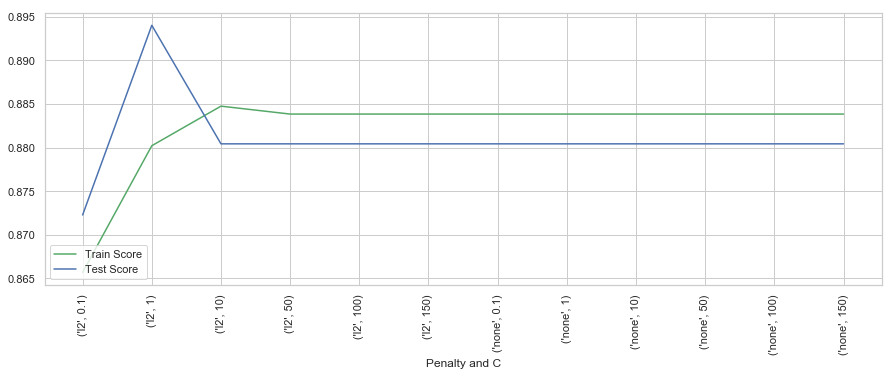

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Penalty and C')

#### KNN- Classification

In [50]:
from sklearn.neighbors import KNeighborsClassifier  
train_score_list = []
test_score_list = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_list.append(knn.score(X_train, y_train))
    test_score_list.append(knn.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[1.0, 0.8856624319419237, 0.896551724137931, 0.867513611615245, 0.8729582577132486, 0.8620689655172413, 0.8693284936479129, 0.8620689655172413, 0.868421052631579, 0.8620689655172413, 0.8666061705989111, 0.8593466424682396, 0.8638838475499092, 0.8548094373865699, 0.8611615245009074, 0.852087114337568, 0.852994555353902, 0.852087114337568, 0.852994555353902]
[0.8288043478260869, 0.8586956521739131, 0.8586956521739131, 0.875, 0.8668478260869565, 0.8586956521739131, 0.8722826086956522, 0.8722826086956522, 0.875, 0.8668478260869565, 0.8641304347826086, 0.8695652173913043, 0.8722826086956522, 0.8722826086956522, 0.8722826086956522, 0.875, 0.8777173913043478, 0.8722826086956522, 0.8695652173913043]


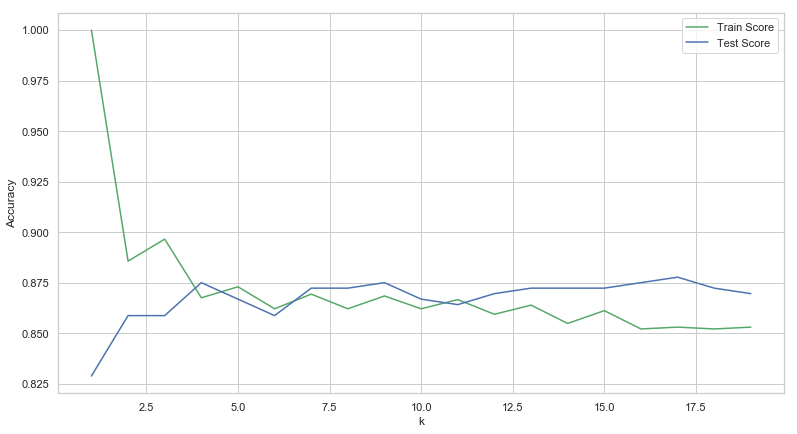

In [51]:
x_axis = range(1,20)
%matplotlib inline
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(x_axis, train_score_list, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_list, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [52]:
#k=6 is possibly the best parameter 

In [53]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

predict_knn = knn.predict(X_test)

confusion = confusion_matrix(y_test, predict_knn)
print("\nConfusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((5+313)/(48+5+313+2)*100))




Train score: 0.8684
Train score: 0.8750

Confusion matrix:
[[315   3]
 [ 43   7]]

Accuracy = 86.4130


In [54]:
from sklearn import metrics

precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, predict_knn)

print("Precision Score (test): %.4f" % precisions[1:])
print("Recall Score (test): %.4f" % recall[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, predict_knn))

Precision Score (test): 0.7000
Recall Score (test): 0.1400
F1 Score (test): 0.2333
AUC Score (test): 0.5653


### SVC KERNEL RBF

In [55]:
from sklearn.svm import SVC

c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        test_score_list.append(svc_rbf.score(X_test, y_test))

Text(0.5, 0, 'C and Gamma')

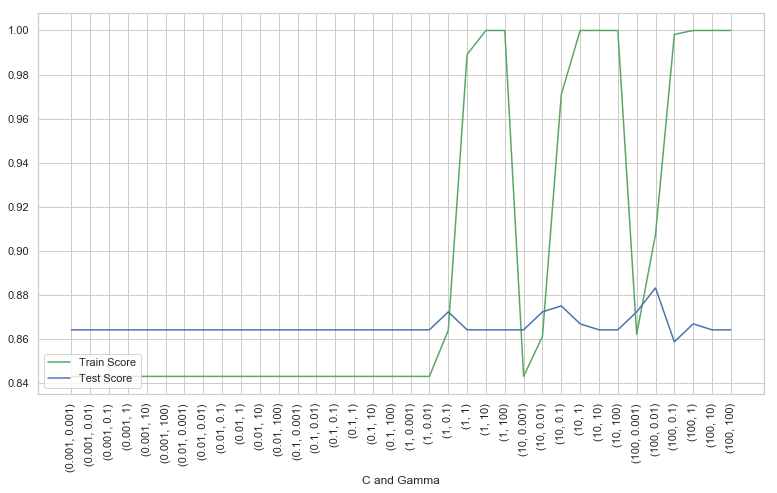

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('C and Gamma')

In [57]:
# C = 100 and gamma= 0.001 seems to be the best parameter as the blue line and green line are the closest to each other 
#at high scores thus giving us a sweet spot for fitting.

In [58]:

svc_rbf = SVC(kernel='rbf', gamma=0.001,C=100)
svc_rbf.fit(X_train,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svc_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_rbf.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
Accuracy= statistics.mean(y_test==pred)*100
print("Accuracy :", Accuracy, '%')


print("Misclassification in predicting Attirion :",100-Accuracy,'%')

Train scores: 0.8620689655172413
Test scores: 0.8722826086956522
Cross-validation Train scores: 0.8539025786834104
Cross-validation Test scores: 0.8641432315962504
Confusion matrix:
[[317   1]
 [ 46   4]]
Accuracy : 87.22826086956522 %
Misclassification in predicting Attirion : 12.771739130434781 %


### SVC Kernel- Linear

In [59]:
c_range = [0.1,0.01,0.001,1,10,100]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.8439201451905626, 0.8430127041742287, 0.8430127041742287, 0.8820326678765881, 0.8838475499092558, 0.882940108892922]
[0.8641304347826086, 0.8641304347826086, 0.8641304347826086, 0.8940217391304348, 0.8913043478260869, 0.8885869565217391]


Text(0.5, 0, 'C')

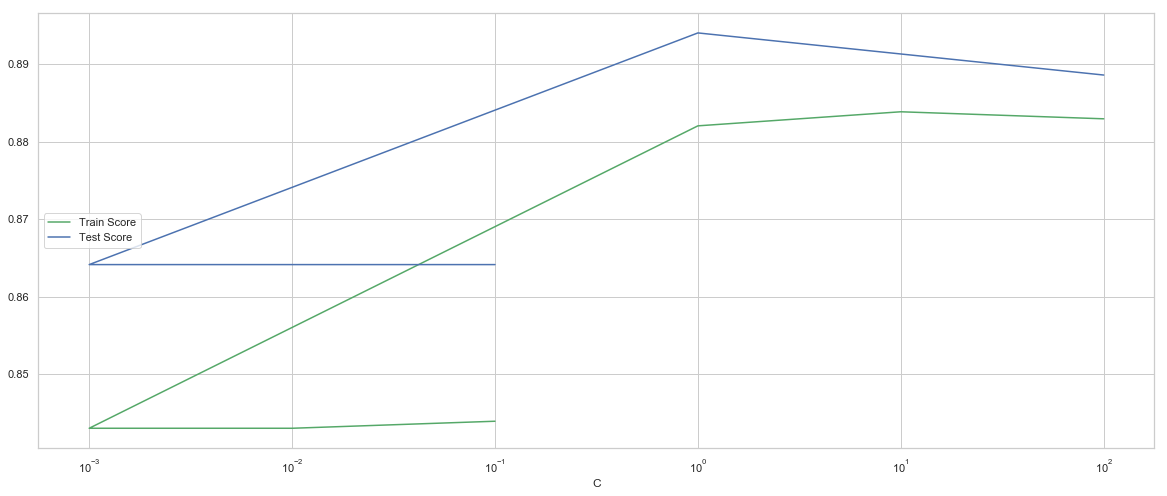

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (20,8))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 6)
plt.xlabel('C')


In [61]:
#C=10 seems to be the best parameter

In [62]:
from sklearn.metrics import confusion_matrix
import statistics

svc_lin = SVC(kernel='linear', C=300)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svc_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
Accuracy= statistics.mean(y_test==pred)*100
print("Accuracy :", Accuracy, '%')
print("Misclassification in predicting Attirition :",100-Accuracy,'%')


Train scores: 0.8820326678765881
Test scores: 0.8885869565217391
Cross-validation Train scores: 0.863898432255262
Cross-validation Test scores: 0.7960815673730508
Confusion matrix:
[[308  10]
 [ 31  19]]
Accuracy : 88.8586956521739 %
Misclassification in predicting Attirition : 11.141304347826093 %


### SVC Polynomial

In [63]:
deg_range = [1,2,3,4]
c_range = [0.001,0.01,0.1,1,10,100]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

Text(0.5, 0, 'Degree and C')

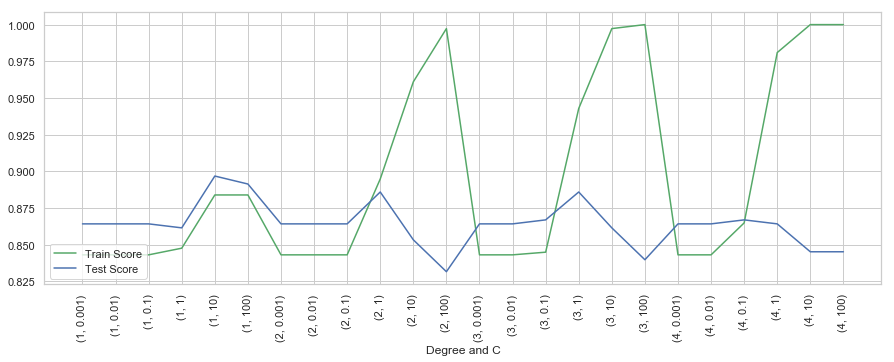

In [64]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and C')

In [65]:
# Degree =1 and C =100 is the probably the best fit parameter because the green line and blue line are the closest at this point

In [66]:
vc_poly = SVC(kernel='poly', degree=1, C=100)
svc_poly.fit(X_train,y_train)

print("Train scores: {}".format(svc_poly.score(X_train, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svc_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_poly.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
Accuracy= statistics.mean(y_test==pred)*100
print("Accuracy :", Accuracy, '%')

print("Misclassification in predicting Attirition :",100-Accuracy,'%')

Train scores: 1.0
Test scores: 0.845108695652174
Cross-validation Train scores: 0.8203337874659401
Cross-validation Test scores: 0.8206273046337021
Confusion matrix:
[[295  23]
 [ 34  16]]
Accuracy : 84.51086956521739 %
Misclassification in predicting Attirition : 15.48913043478261 %


### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)

print("Accuracy of  training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy of  training set: 1.000
Accuracy of test set: 0.788


In [68]:
max_range = [1,2,3,4,5,6,7,8,9,10]

train_score_list = []
test_score_list = []

for m in max_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train, y_train)
    train_score_list.append(dtree.score(X_train,y_train))
    test_score_list.append(dtree.score(X_test, y_test))

Text(0.5, 0, 'Max Depth')

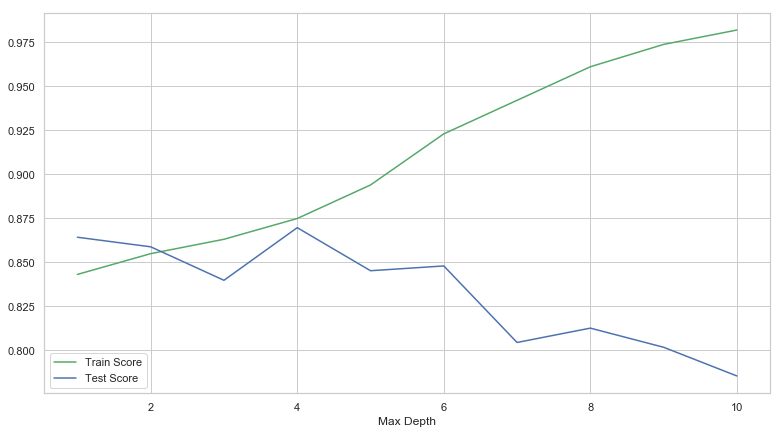

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(max_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(max_range, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max Depth')

In [70]:
# Max depth = 2 looks like the best parameter

In [71]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

pred_d = dtree.predict(X_test)

In [72]:
print("Accuracy on training set: {:.4f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.8548
Accuracy on test set: 0.8587


In [73]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_dt, y_train)
scorestrain = cross_val_score(dtree, X_train_dt, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(dtree, X_test_dt, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred=dtree.predict(X_test_dt)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Accuracy= (statistics.mean(y_test==pred))

misclass = 1-Accuracy

print("Accuracy in predicting Attirition :",Accuracy*100,'%')

print("Misclassification in predicting Attirition :",misclass*100,'%')

Cross-validation Train scores: 0.8448273308849662
Cross-validation Test scores: 0.8587231773957084
Confusion matrix:
[[312   6]
 [ 46   4]]
Accuracy in predicting Attirition : 85.86956521739131 %
Misclassification in predicting Attirition : 14.130434782608692 %


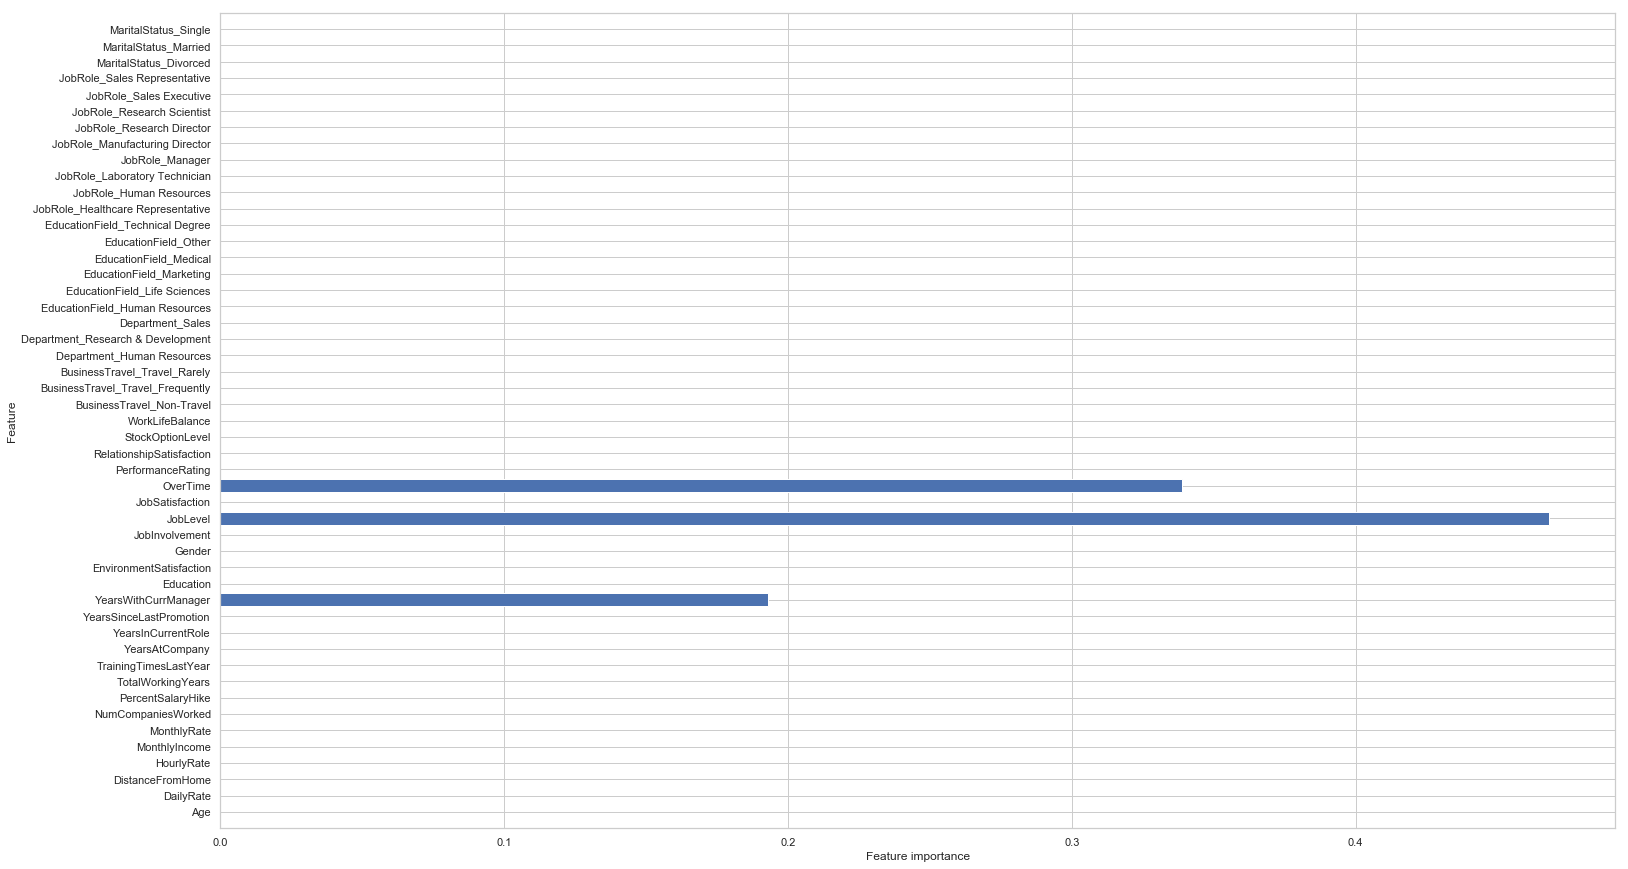

In [241]:
%matplotlib inline
def plot_feature_importances(model):
    fig ,ax= plt.subplots(figsize = (25,15))
    n_features = X_train_org.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_org.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

In [236]:
# Job level is the most important feature

### Logistic Regression is the best performing model as the 
### Cross-validation Train scores: 0.8756886032460609

### Cross-validation Test scores: 0.8532809098582789

### Accuracy in predicting Attirition is 88.58%

### Misclassification in predicting Attrition : 11.41304347826086 %



#                                          PROJECT - 2

### Preprocessing Data

### Scaling the data 

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_dt)
X_test = scaler.transform(X_test_dt)

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### Determining Best Estimators

### KNN

In [76]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


In [77]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.85


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rnd_c = RandomForestClassifier(n_jobs=-1, random_state = 0)
params_r = {'n_estimators': [50, 100, 200 , 500 , 800, 1000],
              'max_leaf_nodes': [2,5,10,15,20,25,30] }
rnd_gs = GridSearchCV(rnd_c, params_r, cv=5)
rnd_gs.fit(X_train, y_train)
rf_best = rnd_gs.best_estimator_
print(rnd_gs.best_params_)

{'max_leaf_nodes': 25, 'n_estimators': 500}


### SVC

In [79]:
from sklearn.svm import SVC
svc_r = SVC(kernel='rbf', random_state=0,probability=True)
grid_p= {'C':[0.01, 0.1, 1, 10, 100], 
             'gamma': [0.01, 0.1, 1, 5, 10, 100]}
grid_s = GridSearchCV(svc_rbf, grid_p, cv = 5, n_jobs  = -1)
grid_s.fit(X_train, y_train)

print('Best params: ', grid_s.best_params_)
print('Best score: ', grid_s.best_score_)

Best params:  {'C': 100, 'gamma': 0.01}
Best score:  0.8738955162484574


### Logistic

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

grid_param = {'penalty':['l1','l2'], 
             'C': [0.1,1,10,50,100,150]}

grid_search = GridSearchCV(logreg, grid_param, cv = 5, n_jobs  = -1)

grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 1, 'penalty': 'l2'}
Best score:  0.8702426984779926


In [81]:
logreg = LogisticRegression(penalty='l2', C=100, random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### From the graph in line 43 project 1 we can see that l2 and C100 are the best parameters

### Voting Classifier Hard

In [82]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('svc', svc_r)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg, knn, svc_r, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8804347826086957
KNeighborsClassifier 0.8668478260869565
SVC 0.875
VotingClassifier 0.875


### Voting CLassifier Soft

In [83]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('svc', svc_r)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg, knn, svc_r, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8804347826086957
KNeighborsClassifier 0.8668478260869565
SVC 0.875
VotingClassifier 0.8858695652173914


### Bagging with Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [85]:
d_tree = DecisionTreeClassifier(random_state=0)

grid_param = {'max_depth':[1,2,3,4,5,6]}

grid_search = GridSearchCV(dtree, grid_param, cv = 5, n_jobs  = -1)

grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'max_depth': 3}
Best score:  0.845750719868367


In [86]:
d_tree = DecisionTreeClassifier(max_depth=1,random_state=0)
bag_clf= BaggingClassifier(dtree, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 0.85
Test score: 0.86
Prediction Accuracy: 0.861
Confusion matrix:
[[317   1]
 [ 50   0]]


### Bagging with SVC

In [87]:

svc_linear = SVC(kernel='linear', C=x)

grid_param = {'C':[1,10,100,200,300]}

grid_search = GridSearchCV(svc_linear, grid_param, cv = 5, n_jobs  = -1)

grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'C': 1}
Best score:  0.8702509255450431


In [88]:
svc_linear = SVC(kernel='linear', C=10)
bag_clf = BaggingClassifier(svc_lin, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Train score: 0.88
Test score: 0.89
Prediction Accuracy: 0.889
Confusion matrix:
[[313   5]
 [ 36  14]]


### Pasting with Decision Tree

In [89]:
d_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
bag_clf = BaggingClassifier(d_tree, n_estimators=500,max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

confusion_m = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion_m))


Train score: 0.84
Test score: 0.86
Prediction Accuracy: 0.864
Confusion matrix:
[[318   0]
 [ 50   0]]


### Ada Boosting with Decision tree

In [90]:
from sklearn.ensemble import AdaBoostClassifier

adab_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,learning_rate=0.1, algorithm="SAMME.R",random_state=0)
adab_clf.fit(X_train, y_train)

trainscore=np.mean(cross_val_score(adab_clf, X_train, y_train, cv=5))
trainscore=np.mean(cross_val_score(adab_clf, X_test, y_test, cv=5))

print('Train score: {:.2f}'.format(trainscore))
print('Test score: {:.2f}'.format(trainscore))

y_pred = adab_clf.predict(X_test)
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 0.84
Test score: 0.84
Prediction Accuracy: 0.889
Confusion matrix:
[[314   4]
 [ 37  13]]


### Ada Boosting with SVC

In [91]:
svc_linear =SVC(kernel='linear',C=10, probability=True)

ada_clf=AdaBoostClassifier(base_estimator=svc_linear,n_estimators=10,learning_rate=0.1, random_state=0, algorithm="SAMME.R")
ada_clf.fit(X_train,y_train)

trainscore =np.mean(cross_val_score(ada_clf, X_train, y_train, cv=5))
testscore =np.mean(cross_val_score(ada_clf, X_test, y_test, cv=5))

print('Train score: {:.2f}'.format(trainscore))
print('Test score: {:.2f}'.format(testscore))
y_pred = ada_clf.predict(X_test)

print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Train score: 0.86
Test score: 0.86
Prediction Accuracy: 0.870
Confusion matrix:
[[316   2]
 [ 46   4]]


### Gradient Boosting

In [92]:
from  sklearn.ensemble import GradientBoostingClassifier
grdb = GradientBoostingClassifier(random_state=0)

grid_param = {'learning_rate':[1,0.5,0.25,0.1,0.05], 'max_depth':[1,2,3,4,5], 'n_estimators':[1,5,10,20,30]}

grid_search = GridSearchCV(grdb, grid_param, cv = 5, n_jobs  = -1)

grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 30}
Best score:  0.8702385849444673


In [93]:

grdb = GradientBoostingClassifier(max_depth=1, learning_rate=1, n_estimators=1, random_state=0)
grdb.fit(X_train,y_train)

scorestrain=np.mean(cross_val_score(grdb, X_train, y_train, cv=5))
scorestest=np.mean(cross_val_score(grdb, X_test, y_test, cv=5))

print('Train score: {:.2f}'.format(scorestrain))
print('Test score: {:.2f}'.format(scorestest))

y_pred = grdb.predict(X_test)

print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 0.84
Test score: 0.85
Prediction Accuracy: 0.851
Confusion matrix:
[[306  12]
 [ 43   7]]


## PCA

In [94]:
from sklearn.decomposition import PCA
import statistics
from sklearn.metrics import confusion_matrix


In [95]:
pca=PCA(n_components=0.95)
pca.fit(X_train)
X_train_reduced=pca.transform(X_train)
X_test_reduced=pca.transform(X_test)
pca.n_components_

31

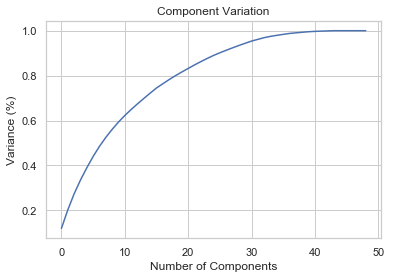

In [96]:
pca = PCA().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Component Variation')
plt.show()

### If 31 components are kept then nearly 99% variance is preserved

### Linear SVC PCA

In [97]:
from sklearn.svm import LinearSVC

linear_pca = LinearSVC(random_state=0)
linear_pca.fit(X_train_reduced, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [98]:
y_pred = linear_pca.predict(X_test_reduced)
print("Accuracy on training set: {:.4f}".format(linear_pca.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.4f}".format(linear_pca.score(X_test_reduced, y_test)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Accuracy on training set: 0.8702
Accuracy on test set: 0.8832
Confusion matrix:
[[312   6]
 [ 37  13]]


###  SVC  - RBF PCA

In [99]:
from sklearn.svm import SVC

param_grid = {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(SVC(kernel='rbf',random_state=0), param_grid=param_grid, cv=5)
grid.fit(X_train_reduced, y_train)
rbf_pca_best = grid.best_estimator_
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 100, 'gamma': 0.01}


In [100]:
y_pred = rbf_pca_best.predict(X_test_reduced)
print("Accuracy on training set: {:.4f}".format(rbf_pca_best.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.4f}".format(rbf_pca_best.score(X_test_reduced, y_test)))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Accuracy on training set: 0.8902
Accuracy on test set: 0.8913
Confusion matrix:
[[315   3]
 [ 37  13]]


### SVC Polynomial PCA

In [101]:
param_grid = {'degree' : [1,2,3,4,5,6,7],
              'C' : [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(SVC(kernel='poly',random_state=0), param_grid=param_grid, cv=5)
grid.fit(X_train_reduced, y_train)
pca_best = grid.best_estimator_

print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 100, 'degree': 1}


In [102]:
y_pred = pca_best.predict(X_test_reduced)
print("Accuracy on training set: {:.4f}".format(pca_best.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.4f}".format(pca_best.score(X_test_reduced, y_test)))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Accuracy on training set: 0.8711
Accuracy on test set: 0.8777
Confusion matrix:
[[314   4]
 [ 41   9]]


### Logistic Regression PCA

In [103]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.logspace(-3,3,7),
              'penalty': ['l1', 'l2']}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
grid.fit(X_train_reduced, y_train)
pca_best = grid.best_estimator_

print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 10.0, 'penalty': 'l2'}


In [104]:
y_pred = pca_best.predict(X_test_reduced)
print("Accuracy on training set: {:.4f}".format(pca_best.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.4f}".format(pca_best.score(X_test_reduced, y_test)))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Accuracy on training set: 0.8748
Accuracy on test set: 0.8832
Confusion matrix:
[[307  11]
 [ 32  18]]


### Knn PCA

In [105]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
print("Parameter grid:\n{}".format(param_grid))

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best parameters: {'n_neighbors': 11}
Best cross-validation score: 0.85


In [106]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_reduced, y_train)
scorestrain=(cross_val_score(knn, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(knn, X_test_reduced, y_test,cv=3)).mean()

pred = knn.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100



confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[288  30]
 [ 35  15]]


### Decision Tree PCA

In [107]:
d_tree = DecisionTreeClassifier(random_state=0)
grid_param = {'max_depth':[1,2,3,4,5]}

grid_search = GridSearchCV(dtree, grid_param, cv = 5, n_jobs  = -1)

grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'max_depth': 1}
Best score:  0.8430152200740435


In [108]:
d_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
d_tree.fit(X_train_reduced, y_train)

trainscore=(cross_val_score(dtree, X_train_reduced, y_train,cv=3)).mean()
testscore=(cross_val_score(dtree, X_test_reduced, y_test,cv=3)).mean()
pred = d_tree.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[318   0]
 [ 50   0]]


In [109]:
table = { 'Logistic Regression': [0.88, 0.88], 'KNN': [0.86, 0.85], 'LinearSVC': [0.88, 0.87], 'SVC-RBF': [0.85, 0.87],
          'SVC-Polynomial': [0.82, 0.86], 'Decision Tree': [0.84, 0.84]}

pd_table = pd.DataFrame(table, index= ['Accuracy without PCA', 'Accuracy with PCA'])

pd_table


,Logistic Regression,KNN,LinearSVC,SVC-RBF,SVC-Polynomial,Decision Tree
Accuracy without PCA,0.88,0.86,0.88,0.85,0.82,0.84
Accuracy with PCA,0.88,0.85,0.87,0.87,0.86,0.84


### For SVM models the accuracy slightly increases when we use PCA other than that accuracy is almost the same.

## DEEP LEARNING

In [307]:
pip install --upgrade tensorflow


  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/bbf49b61370e4f4d245d4c6051dfb6db80cec672605c91b1652ac8cc3d38/tensorboard-2.1.1-py3-none-any.whl
  Using cached htt

tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [3]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Activation


Using TensorFlow backend.


In [124]:
# step1: Building the Model
model = Sequential()

#input layer
model.add(Dense(200, input_dim = 49, activation='relu'))

#hidden layer
model.add(Dense(50, activation = 'relu'))

#output layer
model.add(Dense(2, activation = 'softmax'))

In [125]:
# step2 Model Compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [126]:
# step3 Training the model
model.fit(X_train, Y_train, batch_size= 110, epochs=25)

Train on 1102 samples
Epoch 1/25
1102/1102 [==============================] - 1s 502us/sample - loss: 0.4763 - accuracy: 0.8330
Epoch 2/25
1102/1102 [==============================] - 0s 25us/sample - loss: 0.4089 - accuracy: 0.8430
Epoch 3/25
1102/1102 [==============================] - 0s 29us/sample - loss: 0.3856 - accuracy: 0.8439
Epoch 4/25
1102/1102 [==============================] - 0s 35us/sample - loss: 0.3647 - accuracy: 0.8475
Epoch 5/25
1102/1102 [==============================] - 0s 33us/sample - loss: 0.3480 - accuracy: 0.8548
Epoch 6/25
1102/1102 [==============================] - 0s 33us/sample - loss: 0.3369 - accuracy: 0.8630
Epoch 7/25
1102/1102 [==============================] - 0s 32us/sample - loss: 0.3253 - accuracy: 0.8730
Epoch 8/25
1102/1102 [==============================] - 0s 27us/sample - loss: 0.3197 - accuracy: 0.8739
Epoch 9/25
1102/1102 [==============================] - 0s 31us/sample - loss: 0.3091 - accuracy: 0.8784
Epoch 10/25
1102/1102 [=========

In [129]:
# Step4 Evaluating the Model

loss_and_metrics = model.evaluate(X_test, Y_test)

print("Loss",loss_and_metrics[0])
print("Accuracy",loss_and_metrics[1])

368/368 [==============================] - 0s 35us/sample - loss: 0.3299 - accuracy: 0.8750
Loss 0.32985688422037207
Accuracy 0.875
